Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank.

2) Once model is built, print classification report and analyze precision, recall and f1-score

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import tensorflow as tf
# from tensorflow import keras
# import pandas as pd
# import numpy as np

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### drop rows that are not required

In [5]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#### visualisation

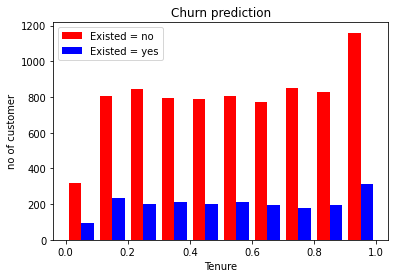

In [35]:
existed_yes = df[df['Exited']== 1].Tenure 
existed_no = df[df['Exited']== 0].Tenure 
plt.xlabel('Tenure')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([existed_no,existed_yes], color = ['red', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

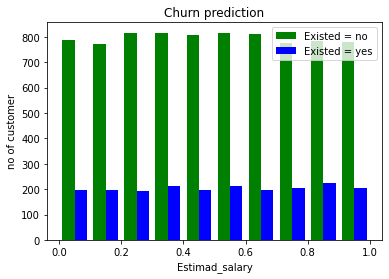

In [36]:
salary_no_existed = df[df.Exited== 0].EstimatedSalary
salary_yes_existed = df[df.Exited== 1].EstimatedSalary
plt.xlabel('Estimad_salary')
plt.ylabel('no of customer')
plt.title('Churn prediction')
plt.hist([salary_no_existed,salary_yes_existed], color = ['green', 'blue'], label =(['Existed = no','Existed = yes']))
plt.legend()

#### converting categorical to numerical

In [6]:
df.Gender = df.Gender.map({'Female':1, 'Male':0}) 
df = pd.get_dummies(data=df, columns=['Geography']) 

In [9]:
scaler = MinMaxScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [14]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Model Training

In [17]:
x = df.drop('Exited', axis = 1) 
y = df.Exited
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [18]:
x_train.shape

(7500, 12)

In [19]:
x_test.shape

(2500, 12)

In [22]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
235/235 [==============================] - 2s 3ms/step - loss: 0.5264 - accuracy: 0.7711
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4665 - accuracy: 0.8031
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4537 - accuracy: 0.8084
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.8101
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.8147
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4303 - accuracy: 0.8171
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.8189
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4159 - accuracy: 0.8248
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4067 - accuracy: 0.8279
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3989 - accura

235/235 [==============================] - 1s 3ms/step - loss: 0.3483 - accuracy: 0.8553
Epoch 82/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8553
Epoch 83/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8549
Epoch 84/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8556
Epoch 85/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8571
Epoch 86/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8561
Epoch 87/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 0.8555
Epoch 88/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3462 - accuracy: 0.8549
Epoch 89/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3473 - accuracy: 0.8567
Epoch 90/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3466 - accuracy: 

In [23]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8604


[0.34126123785972595, 0.8604000210762024]

In [25]:
yp = model.predict(x_test)
yp[:5]

array([[0.05888107],
       [0.1731593 ],
       [0.10040709],
       [0.05118477],
       [0.7208633 ]], dtype=float32)

In [26]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [27]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1996
           1       0.76      0.45      0.57       504

    accuracy                           0.86      2500
   macro avg       0.82      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



Text(69.0, 0.5, 'Truth')

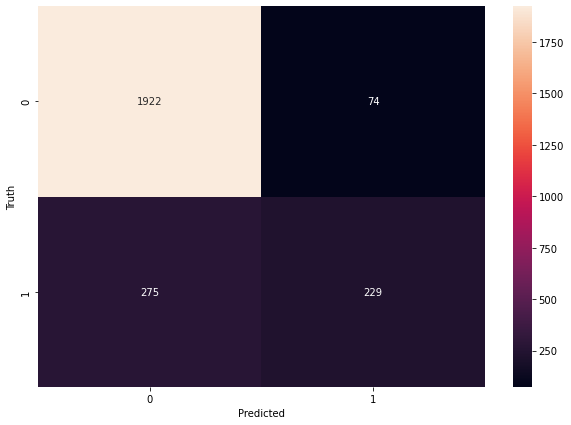

In [29]:
import seaborn as sn
from matplotlib  import pyplot as plt

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy

In [30]:
round((1922+229)/(1922+229+275+74),2)

0.86

#### Precision for 0 class. i.e. Precision for customers who did not churn

In [31]:
round(1922/(1922+275),2)

0.87

#### Precision for 1 class. i.e. Precision for customers who actually churned

In [32]:
round(229/(229+74),2)

0.76

#### Recall for 0 class

In [33]:
round(1922/(1922+74),2)

0.96

In [34]:
round(229/(229+275),2)

0.45